In [1]:
25*6/10

15.0

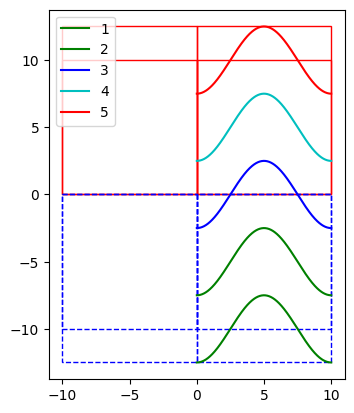

In [2]:
from matplotlib import pyplot as plt
import numpy as np


def rectangle(x, y, width, height, color,linestyle="-"):
    plt.fill([x, x, x + width, x + width], 
             [y, y + height, y + height, y], color="None", edgecolor=color, linestyle=linestyle)

lx = 10

rectangle(0,   0,  lx,  10  , 'red')
rectangle(0,   0, -lx,  10  , 'red')
rectangle(0,   0,  lx, 12.5 , 'red')
rectangle(0,   0, -lx, 12.5 , 'red')



rectangle(0,   0,  lx,  -10  , 'blue',linestyle="--")
rectangle(0,   0, -lx,  -10  , 'blue',linestyle="--")
rectangle(0,   0,  lx, -12.5 , 'blue',linestyle="--")
rectangle(0,   0, -lx, -12.5 , 'blue',linestyle="--")
# aspect ratio

R = 10/4
T = 10

t1 = np.linspace(0, 1, 500)

# =============================================================================
def fparams(t,y0):
    y = 4*R*t 
    x = -R*np.cos(2*np.pi*y/T) + y0
    return y,x

# x1,y1 = fparams(t1,-4*R)

# y1 = t1*2*R + R
# x1 = -R*np.cos(2*np.pi*y1/T) - 4*R

# plt.plot(x1,y1, 'r',label="1")

x1,y1 = fparams(t1,-4*R)
plt.plot(x1,y1, 'g',label="1")  

x2,y2 = fparams(t1,-2*R)
plt.plot(x2,y2, 'g',label="2")  

x3,y3 = fparams(t1,0)
plt.plot(x3,y3, 'b',label="3")

x4,y4 = fparams(t1,2*R)
plt.plot(x4,y4, 'c',label="4")


x5 = 4*R*t1 
y5 = -R*np.cos(2*np.pi*x5/T) + 4*R
# x5,y5 = fparams(t1,4*R)
plt.plot(x5,y5, 'r',label="5")


# y5 = t1*R 
# x5 = -R*np.cos(2*np.pi*y5/T) + 4*R
# plt.plot(x5,y5, 'y' ,label="5")

# y6 = t1*2*R + 3*R
# x6 = -R*np.cos(2*np.pi*y6/T) + 4*R
# plt.plot(x6,y6, 'm' ,label="6")


# =============================================================================


plt.gca().set_aspect('equal', adjustable='box')
plt.legend()

In [3]:
from gmshtools.CircRect6 import CircRect


In [4]:
import gmsh 

gmsh.initialize()

gmsh.model.add("t1")

# cilindro
Ly = 25
Lx = 60
tn  = 3.0
tl = 0.5
r  = 0.32

A = np.pi*r**2

factor = 2.2
rx = factor*r 
ry = (1/factor)*r

R = 10/6
nx_fibres = 6

lx = 20

z0 = tn/2
dx = 0.1 
dz = 0.1

hx = R
hz = tl
Lz = 2*(3*hz + z0) 

def CreateCylinder_Lxx(x0,z0):

    ellipse_1 = CircRect(x0, -Ly/2, z0, 
                         rx, ry, 
                         [0,1,0] ,            # vec_z 
                         [1,0,0])             # vec_x
    
    ellipse_2 = CircRect(x0, +Ly/2, z0,
                            rx, ry, 
                            [0,1,0] ,            # vec_z 
                            [1,0,0])             # vec_x
    gmsh.model.occ.synchronize()

    thrusection = gmsh.model.occ.addThruSections([ellipse_1, ellipse_2])

    gmsh.model.occ.synchronize()

    return thrusection[0][1]

def CreateCylinder_Lyy(y0,z0):
    
    ellipse_1 = CircRect(0, y0, z0,
                            rx, ry, 
                            [1,0,0] ,            # vec_z 
                            [0,1,0])             # vec_x
    
    ellipse_2 = CircRect(lx/2, y0, z0,
                            rx, ry, 
                            [1,0,0] ,            # vec_z 
                            [0,1,0])             # vec_x
    
    gmsh.model.occ.synchronize()



    thrusection = gmsh.model.occ.addThruSections([ellipse_1, ellipse_2])

    gmsh.model.occ.synchronize()

    return thrusection[0][1]

FM1_list = []


In [5]:

from gmshtools.CreateYarnRect import CreateYarnRect

trajs_mid = [ [x1,y1],
              [x2,y2],
              [x3,y3],
              [x4,y4],
              [x5,y5]]

for itraj_2D in trajs_mid:
    trajs = np.array([[itraj_2D[0][i],
                       itraj_2D[1][i], 
                    -z0 - 5*hz/2 ] 
                    for i in range(len(itraj_2D[0]))])

    yarn = CreateYarnRect({"trajs":trajs, 
                    "radius":0.3, 
                    "factor_radius":2.2, 
                    "density":2,
                    "skip_left":1,
                    "skip_right":1,
                    "vec_init":[1,0,0],
                    "vec_end":[1,0,0]})

    FM1_list.append(yarn["volumes"][0][1])
    print("yarn", yarn["volumes"][0][1])
    # gmsh.fltk.run()

yarn 1
yarn 2
yarn 3
yarn 4
yarn 5


In [6]:
yarn

{'volumes': [(3, 5)]}

In [7]:
# gmsh.fltk.run()

In [8]:

box_cut = gmsh.model.occ.addBox( -Lx/2 ,  -Ly/2, -Lz/2, 
                                  Lx   ,   Ly   , Lz)
gmsh.model.occ.synchronize()
# gmsh.fltk.run()

yarn_cut = gmsh.model.occ.intersect(yarn["volumes"], [(3,box_cut)])
gmsh.model.occ.synchronize()
# gmsh.fltk.run()

# gmsh.fltk.run()

FM1_list.append(yarn_cut[0][0][1])



In [9]:
# gmsh.fltk.run()


In [10]:
yarn["volumes"]

[(3, 5)]

In [11]:
yarn_cut

([(3, 5)], [[(3, 5)], [(3, 5)]])

In [12]:
yarn_cut = FM1_list[0]

box_cut = gmsh.model.occ.addBox( -Lx/2    ,  -Ly/2 , -Lz/2, 
                                 Lx ,  Ly   , Lz)
gmsh.model.occ.synchronize()

yarn_cut = gmsh.model.occ.intersect([(3,yarn_cut)], [(3,box_cut)])
gmsh.model.occ.synchronize()

FM1_list.append(yarn_cut[0][0][1])

FM1_list = FM1_list[1:]

In [13]:
# gmsh.fltk.run()

In [14]:
box_cut

6

In [15]:

gmsh.model.occ.synchronize()
# 
#

nfilaments = int(0.5*25*6/10)

yspan = np.arange(-Ly/2, Ly/2, hx)
yspan = yspan + hx/2

FM2_list = []
for iy in yspan:
    FibreMinus_02 = CreateCylinder_Lyy(iy, -z0 - hz/2 )

    FM2_list.append(FibreMinus_02)

FM2_list.extend(FM1_list)






In [16]:
for ix in range(nx_fibres):
    FibreMinus_01 = CreateCylinder_Lxx(hx/2 + hx*ix, -z0 - 3*hz/2 )
    FM1_list.append(FibreMinus_01)

In [17]:




# Identificamos las fibras
fibres_tags = np.concatenate([FM1_list, FM2_list])
f1 = gmsh.model.addPhysicalGroup(3, fibres_tags)
gmsh.model.setPhysicalName(3, f1, "Fibres")


gmsh.model.occ.synchronize()
box_01 = gmsh.model.occ.addBox( 0      , -Ly/2 , + z0 ,
                                Lx/2   ,  Ly   ,  3*hz    )

box_02 = gmsh.model.occ.addBox( 0      , -Ly/2 , - z0 ,
                                lx/2   ,  Ly   ,  -3*hz    )

gmsh.model.occ.synchronize()


box_02_cut = gmsh.model.occ.cut([(3, box_02)], 
                   [(3,i) for i in FM2_list],
                   removeTool=False)

gmsh.model.occ.synchronize()

In [18]:



# # box 
# #
# gmsh.model.occ.synchronize()
# #

box_big_mid = gmsh.model.occ.addBox( 0      , -Ly/2     , -z0,
                                     Lx/2   ,  Ly       ,  2*z0    )


box_sup = gmsh.model.occ.addBox( 0      ,   -Ly/2     , z0 + hz,
                                 Lx/2   ,    Ly   ,  hz       )

# =============================================================================

# partition with rectangle 

# (0, Ly/2,  z0 + 2*hz)
# (0, Ly/2, -z0 - 2*hz)
# (0, -Ly/2, -z0 - 2*hz)
# (0, -Ly/2,  z0 + 2*hz)

p1_rect = gmsh.model.occ.addPoint(0, Ly/2,  z0 + 2*hz)
p2_rect = gmsh.model.occ.addPoint(0, Ly/2, -z0 - 2*hz)
p3_rect = gmsh.model.occ.addPoint(0, 0   , -z0 - 2*hz)
p4_rect = gmsh.model.occ.addPoint(0, 0   ,  z0 + 2*hz)

gmsh.model.occ.synchronize()

l1 =  gmsh.model.occ.addLine(p1_rect, p2_rect)
l2 =  gmsh.model.occ.addLine(p2_rect, p3_rect)
l3 =  gmsh.model.occ.addLine(p3_rect, p4_rect)
l4 =  gmsh.model.occ.addLine(p4_rect, p1_rect)

gmsh.model.occ.synchronize()

ll = gmsh.model.occ.addCurveLoop([l1,l2,l3,l4])
gmsh.model.occ.synchronize()

ss = gmsh.model.occ.addPlaneSurface([ll])
gmsh.model.occ.synchronize()

# gmsh.fltk.run()

box_sup = gmsh.model.occ.fragment([(3,box_sup)], [(2,ss)])
gmsh.model.occ.synchronize()
# =============================================================================

box_inf = gmsh.model.occ.addBox( 0       , -Ly/2     , -z0 - hz,
                                 Lx/2    ,  Ly       ,  -hz       )

gmsh.model.occ.synchronize()
volumes = gmsh.model.getEntities(3)



box_big = gmsh.model.occ.addBox( 0     ,  -Ly/2      , -Lz/2,
                                 Lx/2  ,   Ly        ,  Lz    )

gmsh.model.occ.synchronize()

# cut box_big - volumes
box_big = gmsh.model.occ.fragment([(3,box_big)], volumes)



gmsh.model.occ.synchronize()


# buscar la caja que tiene como media z= 0


In [19]:
gmsh.model.occ.synchronize()
volumes = gmsh.model.getEntities(3)
com = [ gmsh.model.occ.getCenterOfMass(3, i[1]) 
       for i in volumes ]
#encontart volumenes con yCOM > 12.5
volumes = [volumes[i] for i in range(len(volumes)) if com[i][1] > 12.5]
# eliminar volumenes
gmsh.model.occ.remove([i for i in volumes],recursive=True)
gmsh.model.occ.synchronize()

In [20]:
volumes

[]

In [21]:
# gmsh.fltk.run()


In [22]:
# Identificamos el nucleo
# Este es el volumen con menor valor de z en valor absoluto
volumes = gmsh.model.getEntities(3)
com = [ gmsh.model.occ.getCenterOfMass(3, i[1]) 
       for i in volumes ]


sort_com_index = np.argsort(np.abs(np.array(com)[:,2]))

id_nucleo = volumes[sort_com_index[0]][1]
# physical group
f2 = gmsh.model.addPhysicalGroup(3, [id_nucleo])
gmsh.model.setPhysicalName(3, f2, "Nucleo")
# 
gmsh.model.occ.synchronize()

In [23]:


# Selecionamos todos los volumenes que no sean ni fibras ni nucleo
resina = [ i[1] for i in volumes if i[1] != id_nucleo ]
resina = [ i for i in resina if i not in fibres_tags]


# sort by x
com = [ gmsh.model.occ.getCenterOfMass(3, i) 
       for i in resina ]

sort_com_index = np.argsort(np.abs(np.array(com)[:,0]))

resina = [resina[i] for i in sort_com_index]

# select solo las z<0 
resina = [i for i in resina if gmsh.model.occ.getCenterOfMass(3,i)[2] < 0]

In [24]:
f3 = gmsh.model.addPhysicalGroup(3, resina)
gmsh.model.setPhysicalName(3, f3, "Resina")

In [25]:
layers_centrales = resina[:4]


com_centrals = [ gmsh.model.occ.getCenterOfMass(3, i)
         for i in layers_centrales ]

# sort by z
sort_com_index = np.argsort(np.array(com_centrals)[:,2])
layers_centrales = [layers_centrales[i] for i in sort_com_index]

resina = layers_centrales[:2]




In [26]:
resina

[31, 32]

In [27]:
layers_centrales

[31, 32, 36, 34]

In [58]:

volumes = gmsh.model.getEntities(3)
volumes = [ i for i in volumes if i[1] not in resina]
volumes = [ i for i in volumes if i[1] not in fibres_tags]
volumes = [ i for i in volumes if i[1] != id_nucleo]


In [60]:

capas_3= [ i[1]
           for i in volumes 
           if abs(gmsh.model.occ.getCenterOfMass(3, i[1])[2]) > tn/2  ] 

# sort by z
com = [ gmsh.model.occ.getCenterOfMass(3, i) 
       for i in capas_3 ]

sort_com_index = np.argsort(abs(np.array(com)[:,2]))

capas_3 = [capas_3[i] for i in sort_com_index]
capas_3

com = [ gmsh.model.occ.getCenterOfMass(3, i)
            for i in capas_3 ]

In [61]:
[ abs(i[2]) for i in com ]

[1.7499999999999907,
 1.7499999999999987,
 1.75,
 2.25,
 2.2500000000000004,
 2.75,
 2.75]

In [48]:

capas_1 = [capas_3[0]]
capas_2 = [capas_3[1]]
capas_3 = [capas_3[2]]

In [31]:
capas_3

[36]

In [32]:




f5 = gmsh.model.addPhysicalGroup(3, capas_1)
gmsh.model.setPhysicalName(3, f5, "CAPAS_1")

f4 = gmsh.model.addPhysicalGroup(3, capas_2)
gmsh.model.setPhysicalName(3, f4, "CAPAS_2")

f6 = gmsh.model.addPhysicalGroup(3, capas_3)
gmsh.model.setPhysicalName(3, f6, "CAPAS_3")
#

In [33]:
# gmsh.fltk.run()



In [34]:
# # set mesh 
# gmsh.option.setNumber("Mesh.CharacteristicLengthMin", 0.25*r)
# gmsh.option.setNumber("Mesh.CharacteristicLengthMax", 4.0*r)


#algorithm
gmsh.option.setNumber("Mesh.Algorithm", 6)

# gmsh.option.setNumber("Mesh.CharacteristicLengthMin", 0.4*r)
# gmsh.option.setNumber("Mesh.CharacteristicLengthMax", 4.0*r)

# gmsh.option.setNumber("Mesh.MeshSizeFromCurvature", 10) # 20

# gmsh.option.setNumber("Mesh.SmoothRatio", 1.5) # 20

# # gmsh 
#


In [35]:

# field = gmsh.model.mesh.field
# field.add("MathEval", 1)

# THX = "(0.5 + 0.5*Tanh(10*(-x + x0)) )  * (0.5 + 0.5*Tanh(10*(x + x0)) )"

# THZ_MINUS = "( 0.5 + 0.5*Tanh(10*(-z - z0)) )"
# THY = "(0.5 + 0.5*Tanh(10*(y - y0)) )"


# Fz = "1.0 - 0.55 * THX * THZ_MINUS - 0.35 * THY*THZ_MINUS"

# Fz = Fz.replace("THX", THX)
# Fz = Fz.replace("THZ_MINUS", THZ_MINUS)
# Fz = Fz.replace("THY", THY)

# Fz = Fz.replace("y0", str(0.975*Ly/2))
# Fz = Fz.replace("z0", str(z0 - 1))
# Fz = Fz.replace("x0", str(lx/2 + 1))
# field.setString(1, "F", Fz)

# # Aplicar el campo de fondo
# field.setAsBackgroundMesh(1)



In [36]:


def BoxRefine(x1,x2,y1,y2,z1,z2,vin,vout):

    field_tag = gmsh.model.mesh.field.add("Box")

    gmsh.model.mesh.field.setNumber(field_tag, "VIn", vin)
    gmsh.model.mesh.field.setNumber(field_tag, "VOut", vout)

    gmsh.model.mesh.field.setNumber(field_tag, "XMin", x1)
    gmsh.model.mesh.field.setNumber(field_tag, "XMax", x2)

    gmsh.model.mesh.field.setNumber(field_tag, "YMin", y1)
    gmsh.model.mesh.field.setNumber(field_tag, "YMax", y2)

    gmsh.model.mesh.field.setNumber(field_tag, "ZMin", z1)
    gmsh.model.mesh.field.setNumber(field_tag, "ZMax", z2)

    # Thickness
    gmsh.model.mesh.field.setNumber(field_tag, "Thickness", 1.0)

    return field_tag

BaseMeshSize = 1.2

field_tag_base = BoxRefine(0, Lx, 
                           -Ly/2, Ly/2, 
                           -Lz/2, Lz/2,
                            BaseMeshSize, BaseMeshSize)

FineMeshSize = 0.35

eps = 1.1
field_tag_fine = BoxRefine(    0        , lx/2,+1
                            -Ly/2        , Ly/2, 
                            -z0 - 3*hz , -z0 - hz + eps ,
                            FineMeshSize, BaseMeshSize)

BordeMeshSize = 0.35
# Ly borde 
field_tag_border_1 = BoxRefine(0    , lx/2,
                             0.9*Ly/2 , Ly/2,
                            -z0 - 3*hz , -z0 - hz + eps ,
                             BordeMeshSize, BaseMeshSize)

# Ly borde BordeMeshSize = 0.35
BordeMeshSize = 0.30

field_tag_border_2 = BoxRefine(0    , lx/2,
                             -Ly/2 , -0.9*Ly/2,
                            -z0 - 3*hz , -z0 - hz + eps ,
                             BordeMeshSize, BaseMeshSize)
BordeMeshSize = 0.30

field_tag_border_3 = BoxRefine(0.9*lx/2    , lx/2,
                                -Ly/2 , Ly/2,
                                -z0 - 3*hz , -z0 - hz + eps ,
                                BordeMeshSize, BaseMeshSize)
BordeMeshSize = 0.35

field_tag_border_4 = BoxRefine(  0    , eps,
                                -Ly/2 , Ly/2,
                                -z0 - 3*hz , -z0  ,
                                BordeMeshSize, BaseMeshSize)
# syncro

field_tag_min =  gmsh.model.mesh.field.add("Min")
gmsh.model.mesh.field.setNumbers(field_tag_min, "FieldsList", 
                                [field_tag_base, field_tag_fine,
                                 field_tag_border_1,
                                 field_tag_border_2,
                                 field_tag_border_3,
                                 field_tag_border_4])

gmsh.model.mesh.field.setAsBackgroundMesh(field_tag_min)

gmsh.option.setNumber("Mesh.MeshSizeExtendFromBoundary", 0)
gmsh.option.setNumber("Mesh.MeshSizeFromPoints", 0)
gmsh.option.setNumber("Mesh.MeshSizeFromCurvature", 7)


In [37]:
field_tag_min

7

In [38]:
# gmsh.fltk.run()

In [39]:

gmsh.model.mesh.generate(3)
# optimize
# second order 
gmsh.model.mesh.optimize("Netgen",force=False)
gmsh.model.mesh.setOrder(2)

gmsh.write("t1_large.inp")

In [40]:
E1 = 8000 
E2 = 700 

Ec = 8000

nu = 0.3 
Em = 1000
En = 800


In [85]:
from djccx.inp.inp import  inp 

inp_f = inp("t1_large.inp")

inp_f.remove_by_type(2)

nodes = inp_f.nodes.df

nodes_sym = nodes.copy()
nodes_sym = nodes_sym[ nodes_sym["x"] < 1e-3] 

nset_sym_x = inp_f.CreateNsetFromIds(nodes_sym.index, "sym_x")

# nodes_sym = nodes.copy()
# nodes_sym = nodes_sym[ nodes_sym["y"] < 1e-3] 

# nset_sym_y = inp_f.CreateNsetFromIds(nodes_sym.index, "sym_y")

nodes_fixed = nodes.copy()
nodes_fixed = nodes_fixed[ nodes_fixed["x"] > 0.5*Lx  - 1e-1]
nodes_fixed = nodes_fixed[ nodes_fixed["z"] < -0.5*Lz + 1e-1]

nset_fixed = inp_f.CreateNsetFromIds(nodes_fixed.index, "fixed")

# nodes_fixed_minus = nodes.copy()
# nodes_fixed_minus = nodes_fixed_minus[ nodes_fixed_minus["x"] < -0.5*Lx + 1e-1]
# nodes_fixed_minus = nodes_fixed_minus[ nodes_fixed_minus["z"] < -0.5*Lz + 1e-1]

# nset_fixed_minus = inp_f.CreateNsetFromIds(nodes_fixed_minus.index, "fixed_minus")

nodes_force = nodes.copy()
z_unique = nodes_force["z"].unique()
z_unique = np.sort(z_unique)
nodes_force = nodes_force[ nodes_force["x"]  == 0]
nodes_force = nodes_force[ nodes_force["z"] == z_unique[-1] ]
nset_force = inp_f.CreateNsetFromIds(nodes_force.index, "force")

# materials 
mat_fibras = inp_f.CreateElasticMaterial("FIBRES", Ec, nu)
mat_resina = inp_f.CreateElasticMaterial("RESINA", Em, nu)
mat_capas_1 = inp_f.CreateElasticMaterial("CAPAS_1", E1, nu)
mat_capas_2 = inp_f.CreateElasticMaterial("CAPAS_2", E1, nu)
mat_capas_3 = inp_f.CreateElasticMaterial("CAPAS_3", E2, nu)

mat_nucleo = inp_f.CreateElasticMaterial("NUCLEO", En, nu)


# elsets 
fibres_elset = inp_f.select("FIBRES","elset")
resina_elset = inp_f.select("RESINA","elset")
capas_1_elset = inp_f.select("CAPAS_1","elset")
capas_2_elset = inp_f.select("CAPAS_2","elset")
capas_3_elset = inp_f.select("CAPAS_3","elset")
nucleo_elset = inp_f.select("NUCLEO","elset")

inp_f.CreateSolidSection( fibres_elset, mat_fibras)
inp_f.CreateSolidSection( resina_elset, mat_resina)
inp_f.CreateSolidSection( capas_1_elset, mat_capas_1)
inp_f.CreateSolidSection( capas_2_elset, mat_capas_2)
inp_f.CreateSolidSection( capas_3_elset, mat_capas_3)
inp_f.CreateSolidSection( nucleo_elset, mat_nucleo)
#

istep = inp_f.CreateStaticStep()
istep.CreateBoundary(nset_fixed,3,0)
istep.CreateBoundary(nset_sym_x,1,0)

disp = 5
istep.CreateBoundary(nset_force, 3, -disp)


inp_f.print("t1_new_large.inp")

In [86]:
nodes_force

,x,y,z
nid,,,
855,0.0,-1.250000e+01,1.5
856,0.0,1.250000e+01,1.5
33178,0.0,-1.130952e+01,1.5
33179,0.0,-1.011905e+01,1.5
33180,0.0,-8.928571e+00,1.5
33181,0.0,-7.738095e+00,1.5
33182,0.0,-6.547619e+00,1.5
33183,0.0,-5.357143e+00,1.5
33184,0.0,-4.166667e+00,1.5


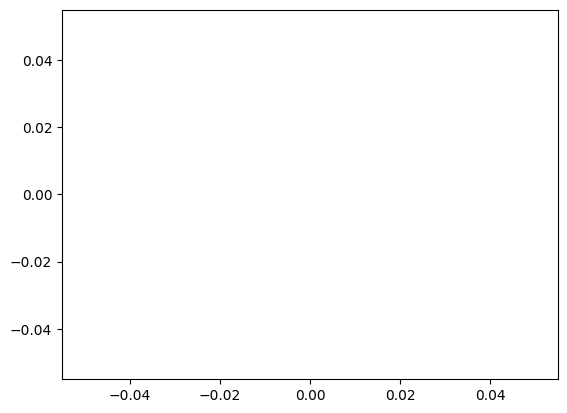

In [ ]:
from matplotlib import pyplot as plt

plt.plot(nodes_force["x"], nodes_force["z"], "o")

In [42]:
fibres_elset = inp_f.select("FIBRES","elset")


In [43]:
inp_f.elsets

[Card (*ELSET) :FIBRES,
 Card (*ELSET) :NUCLEO,
 Card (*ELSET) :RESINA,
 Card (*ELSET) :CAPAS_1,
 Card (*ELSET) :CAPAS_2,
 Card (*ELSET) :CAPAS_3]

In [44]:
0.5*Lz - 1e-3

2.999